# IO Tests
Based on a few of the examples from the [ImageJ tutorials](https://github.com/imagej/imagej-tutorials/tree/master/)

In [1]:
classpath.addRepository("http://maven.imagej.net/content/groups/public")
classpath.add("net.imagej" % "imagej" % "2.0.0-rc-50") // use % since %% adds scala version
classpath.add("de.christophkraemer" % "rhino-script-engine" % "1.1.0")  // since it's not in the classpath with notebooks per default

22 new artifact(s)

22 new artifacts in macro


22 new artifacts in runtime
22 new artifacts in compile


2 new artifact(s)

2 new artifacts in macro


2 new artifacts in runtime
2 new artifacts in compile


In [2]:
/** add a preview command to show the data **/
implicit class previewDataset(curSet: net.imagej.Dataset)(implicit ij: net.imagej.ImageJ) {
    /** saves the file to a temporary directory, read it in again as a bytearray and feed it to the jupyter function **/
    def preview() = {
        val tFile = java.io.File.createTempFile("jupy",".jpg")
        ij.scifio().datasetIO().save(curSet,tFile.getPath())
        val imgFIS = new java.io.FileInputStream(tFile.getPath())
        val out = new Array[Byte](imgFIS.getChannel().size().toInt)
        imgFIS.read(out)
        display.jpg(out)
    }
}
import net.imglib2.`type`.numeric.RealType
implicit class dsImgPlus[T <: RealType[T], U <: net.imglib2.img.Img[T]](curImg: U)(implicit ij: net.imagej.ImageJ) {
    def toDataset() = {
        new net.imagej.DefaultDataset(ij.getContext(),net.imagej.ImgPlus.wrap(curImg))
    }
    def preview(): Unit = toDataset().preview()
}

defined class previewDataset
import net.imglib2.`type`.numeric.RealType
defined class dsImgPlus

In [3]:
implicit val ij = new net.imagej.ImageJ() // so it stays in the namespace
ij.ui().setDefaultUI(ij.ui().getUI("swing"))

ij: net.imagej.ImageJ = net.imagej.ImageJ@15dcce44

In [4]:
val dataset = ij.scifio().datasetIO().open("sample-data/Ocean.png");

dataset: net.imagej.Dataset = Ocean.png

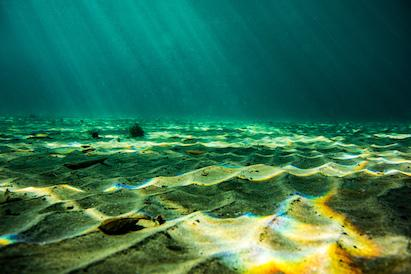

In [5]:
dataset.preview() // show inline

In [6]:
ij.ui().show(dataset) // show in a new window

: 

In [7]:
ij.scifio().datasetIO().save(dataset,"test.png") // save the data elsewhere

res6: io.scif.Metadata = io.scif.formats.APNGFormat$Metadata@39a113e7